## Find the flag

*Goal:* train a binary decision tree classifier to predict whether a flag comes from Europe or Oceania based on several features of the flag.

Some of the features of the dataset are:
- `name` - name of the country 
- `landmass` - continent 
 1. North America
 2. South America
 3. Europe 
 4. Africa 
 5. Asia
 6. Oceania
- `bars` - number of vertical bars in the flag 
- `stripes` - number of horizontal stripes in the flag 
- `colours` - number of different colors in the flag 
- `mainhue` - predominant color in the flag 
- `circles` - number of circles in the flag 
- `crosses` - number of upright crosses 
- `quarters` - number of quartered sections 
- `sunstars` - number of sun or star symbols 

### Investigating the data

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Source: https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols) 
 
# variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [10]:
# Count of flags by landmass value 
landmass_name = {1: 'North America', 2: 'South America', 3: 'Europe', 4: 'Africa', 5: 'Asia', 6: 'Oceania'}
print(
  df.landmass.map(landmass_name).value_counts()
)

landmass
Africa           52
Asia             39
Europe           35
North America    31
Oceania          20
South America    17
Name: count, dtype: int64


In [14]:
# New dataframe as a subset of the original dataframe with just Europe and Oceania 
df = df[df.landmass.isin([3, 6])]
df.landmass.map(landmass_name).value_counts()

landmass
Europe     35
Oceania    20
Name: count, dtype: int64

In [31]:
# Average values of each predictor for the two continents 
numeric_var = var[:7] + var[8:]
print(
  df.groupby('landmass')[numeric_var].mean().T
)

landmass         3     6
red       0.828571  0.80
green     0.200000  0.20
blue      0.514286  0.80
gold      0.428571  0.60
white     0.771429  0.95
black     0.171429  0.15
orange    0.057143  0.15
bars      0.628571  0.00
stripes   1.285714  0.40
circles   0.028571  0.15
crosses   0.285714  0.40
saltires  0.028571  0.30
quarters  0.028571  0.40
sunstars  0.142857  3.30
triangle  0.028571  0.25
animate   0.114286  0.30


In [33]:
# Variable types for the predictors of interest 
df[var].dtypes

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object

In [37]:
# Transforming the predictor variables to dummy variables 
X = pd.get_dummies(df[var], drop_first=True)
y = df.landmass
print(X.head())

    red  green  blue  gold  white  black  orange  bars  stripes  circles  ...  \
1     1      0     0     1      0      1       0     0        0        0  ...   
3     1      0     1     1      1      0       1     0        0        0  ...   
4     1      0     1     1      0      0       0     3        0        0  ...   
10    1      0     1     0      1      0       0     0        0        0  ...   
11    1      0     0     0      1      0       0     0        3        0  ...   

    saltires  quarters  sunstars  triangle  animate  mainhue_blue  \
1          0         0         1         0        1         False   
3          0         0         0         1        1          True   
4          0         0         0         0        0         False   
10         1         1         6         0        0          True   
11         0         0         0         0        0         False   

    mainhue_gold  mainhue_green  mainhue_red  mainhue_white  
1          False          False     

In [51]:
# Splitting the dataset into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Tuning the classifier by depth

In [52]:
# Possible values of max depth parameter 
max_depth_range = range(1,21)
# Store accuracy scores 
acc_depth = []

for max_depth in max_depth_range:
  dtree = DecisionTreeClassifier(max_depth=max_depth)
  dtree.fit(X_train, y_train)
  acc_test_score = dtree.score(X_test, y_test)
  acc_depth.append(acc_test_score)

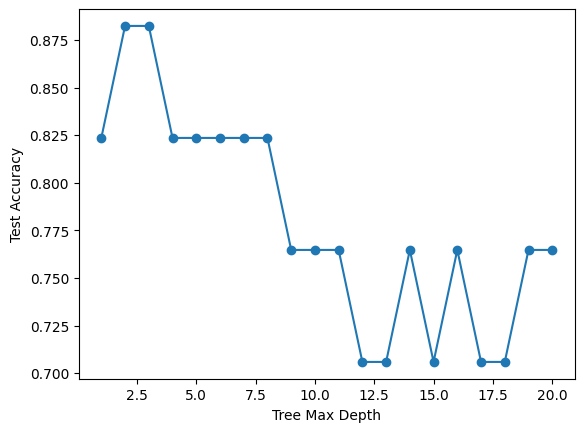

In [53]:
# Plotting accuracy scores as a function of depth 
plt.plot(max_depth_range, acc_depth, marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Test Accuracy')
plt.show()

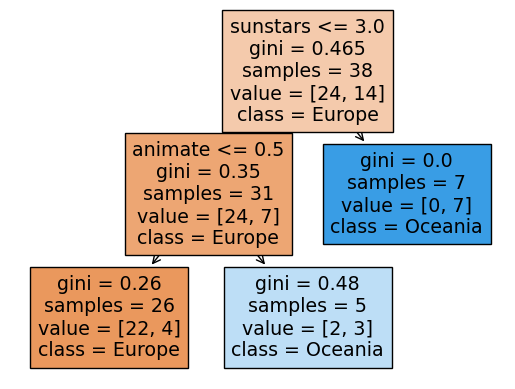

In [58]:
# Best performing tree (maximum accuracy)
depth_idx = np.array(acc_depth).argmax()
depth = max_depth_range[depth_idx]

# Refitting tree 
dtree = DecisionTreeClassifier(max_depth=depth)
dtree.fit(X_train, y_train)
plot_tree(dtree, feature_names = X_train.columns, max_depth=depth, class_names = ['Europe', 'Oceania'], label='all', filled=True)
plt.show() 


### Tuning the classifer by pruning (ccp_alpha parameter)

In [64]:
# Options of values 
ccp = np.logspace(-3, 0, 20)
acc_pruned = []
for ccp_alpha in ccp: 
  dtree = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
  dtree.fit(X_train, y_train)
  acc_test_score = dtree.score(X_test, y_test)
  acc_pruned.append(acc_test_score)

[0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7647058823529411, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118]


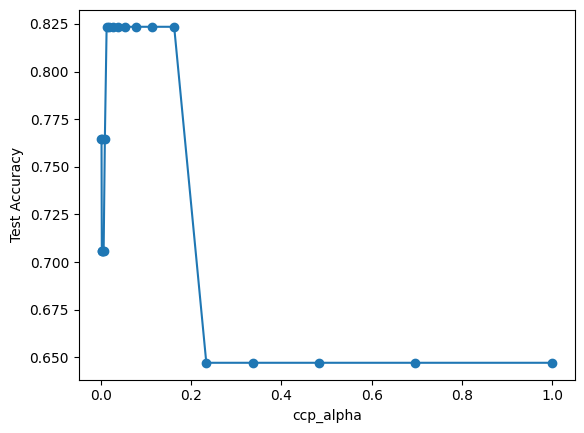

In [72]:
# Plot accuracy versus ccp 
plt.plot(ccp, acc_pruned, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel('Test Accuracy')
plt.show()

In [82]:
# Largest accuracy and corresponding ccp_alpha
ccp_alpha_idx = np.argmax(np.array(acc_pruned))
ccp_alpha = ccp[ccp_alpha_idx]
max_acc = max(acc_pruned)
print(f"Accuracy = {max_acc*100:.1f}%, at ccp_alpha={ccp_alpha:.4f}")

Accuracy = 82.4%, at ccp_alpha=0.0127


0.82


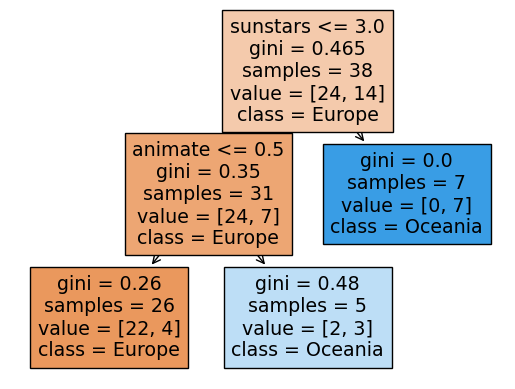

In [88]:
# Refitting the tree with optimal max_depth and ccp_alpha
dtree = DecisionTreeClassifier(max_depth=depth, ccp_alpha=ccp_alpha)
dtree.fit(X_train, y_train)
acc_test_score = dtree.score(X_test, y_test)
print(f"{acc_test_score:.2f}")
plot_tree(dtree, feature_names = X_train.columns, max_depth=depth, class_names = ['Europe', 'Oceania'], label='all', filled=True)
plt.show()